In [218]:
from gensim.models import Word2Vec
import pandas as pd



In [219]:
df = pd.read_pickle("data/all_tokenized.pkl")
df.tail(1)

,index,date,tag,title,link,media,article,title_tokens,title_pos,article_tokens,title_tokens_removePunc,article_tokens_removePunc
502,63,1天前,社會,1歲童虐死案非家屬出養？ 新北：母親產後簽約,https://news.tvbs.com.tw/local/2422476,NaN,1歲男童疑遭虐死震驚社會。新北議員卓冠廷說，男童阿嬤未主動提要出養，是社工提的，新北社會局說...,"[1, 歲, 童, 虐死, 案, 非, 家屬, 出養, ？, , 新北, ：, 母親, 產...","[Neu, Nf, Na, Na, Na, VG, Na, VC, QUESTIONCATE...","[1, 歲, 男童, 疑, 遭, 虐死, 震驚, 社會, 。, 新北, 議員, 卓冠廷, 說...","[1, 歲, 童, 虐死, 案, 非, 家屬, 出養, 新北, 母親, 產, 後, 簽約]","[1, 歲, 男童, 疑, 遭, 虐死, 震驚, 社會, 新北, 議員, 卓冠廷, 說, 男..."


In [295]:
df = df[df['title'].str.contains("社工")]

In [296]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(24, 16)
# 
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = ['Heiti TC']

<Figure size 2400x1600 with 0 Axes>

In [300]:
model = Word2Vec(df['article_tokens_removePunc'], min_count=5, max_vocab_size=None, vector_size=250, window=25, sg=1, workers=4, epochs=15)
print(model.wv.most_similar(["社工"], topn=30))



[('夥伴', 0.4709942936897278), ('接住', 0.4501572549343109), ('上銬', 0.4332525134086609), ('網路', 0.4307672381401062), ('感謝', 0.4300789535045624), ('直言', 0.4255980849266052), ('家扶', 0.4246923327445984), ('手銬', 0.42385244369506836), ('熱議', 0.4188900291919708), ('服務處', 0.4188840091228485), ('再度', 0.4171736538410187), ('中正', 0.4135773181915283), ('指出', 0.40986284613609314), ('抨擊', 0.40747663378715515), ('台', 0.40614426136016846), ('具', 0.4055826961994171), ('集體', 0.4055376350879669), ('陳姓', 0.4046548902988434), ('29', 0.4034254252910614), ('社群', 0.4032745063304901), ('傍晚', 0.4032523036003113), ('戴上', 0.40237903594970703), ('支援', 0.40192484855651855), ('移送', 0.4013652503490448), ('事宜', 0.40123283863067627), ('聲明稿', 0.40093347430229187), ('出走潮', 0.40039461851119995), ('幕', 0.4000362157821655), ('通靈', 0.3987164795398712), ('身分', 0.39856040477752686)]


In [301]:
import unicodedata # for removing Chinese puctuation
from collections import Counter

# print(unicodedata.category('我').startswith('P'))

word_count = Counter()
for tokens in df['article_tokens_removePunc']:
    for tok in tokens:
        try:
            if len(tok) > 1 and not unicodedata.category(tok[0]).startswith('P'):
                word_count[tok] += 1
        except:
            print("%s\tTypeError: category() argument must be a unicode character, not str"%(tok))
for k, v in word_count.most_common(10):
    print(k, '\t', v)

社工 	 1894
保母 	 575
社會 	 453
凱凱 	 377
上銬 	 358
訪視 	 304
陳姓 	 302
男童 	 284
兒福聯盟 	 244
工作 	 213


In [302]:
words = [k for k, v in word_count.most_common(150)]
print(words)
X = []
for word in words:
    X.append(model.wv[word])

['社工', '保母', '社會', '凱凱', '上銬', '訪視', '陳姓', '男童', '兒福聯盟', '工作', '劉姓', '警方', '致死', '記者', '兒盟', '質疑', '孩子', '台北市', '台北', '移送', '事件', '報導', '聯盟', '兒福', '照顧', '原則', '虐死', '發生', '面對', '姊妹', '照片', '個案', '責任', '服務', '媒體', '陳女', '地檢署', '紀錄', '過失', '家屬', '人員', '負責', '過程', '調查', '偽造', '相關', '發現', '引發', '網友', '針對', '文書', '畫面', '12日', '真的', '戒具', '虐待', '比例', '小孩', '臉書', '案件', '專業', '檢警', '更多', '北市', '化名', '指出', '希望', '搜索', '新聞', '交保', '  ', '檢討', '12月', '政府', '台灣', '拒絕', '司法', '狀況', '9月', '公開', '暴力', '檢方', '提供', '事情', '執行', '30萬', '工會', '家庭', '接受', '台大', '親友', '法律', '聲明', '複訊', '撥打', '去年', '兒童', '曝光', '協助', '機構', '釐清', '時間', '劉女', '約談', '保護', '偵查', '拘提', '董事長', '凌虐', '職業', '福利', '113', '報告', '第一線', '中心', '律師', '大眾', '情況', '配合', '解送', '110', '手銬', '單位', '林志嘉', '基金會', '違反', '到案', '支持', '造假', '提出', '記者會', '辦法', '社工系', '帶回', '地方', '北檢', '被告', '發文', '導致', '機關', '呼籲', '無罪', '法人', '回應', '提到', '第一', '托育', '社會局', '勇敢', '很多']


In [225]:
from sklearn.decomposition import PCA

In [303]:
pca = PCA(n_components=10)
points = pca.fit_transform(X)

points[:20]

array([[ 2.28209772e-01, -1.40396524e-01, -1.48539521e-01,
         2.86410484e-01, -1.01472627e-01, -5.18543792e-01,
        -1.46272067e-01,  5.26694550e-02,  8.12615685e-02,
        -1.49713665e-02],
       [-5.98220521e-01, -7.67980287e-01, -1.08730822e-01,
        -4.47109317e-01,  2.31093548e-02,  2.88977659e-02,
        -8.93268918e-03, -1.11776735e-02, -1.51499235e-01,
         7.82719055e-02],
       [ 6.39434631e-01, -3.05107994e-01,  3.95660774e-02,
         6.22339904e-01, -5.42224749e-01,  1.26904629e-01,
        -2.51750860e-01,  6.41712821e-02,  2.68952009e-01,
        -6.96932566e-01],
       [-1.11137024e+00, -6.82208030e-01,  2.35166604e-01,
        -8.88017732e-01,  2.64838417e-01,  2.16104862e-01,
         3.13726654e-01,  1.18336139e-01,  1.28258498e-01,
         7.70581224e-02],
       [ 2.99097814e-01,  1.01071686e+00, -1.81682971e-01,
         2.06178295e-01, -2.38607836e-01, -4.74759518e-01,
        -4.98299260e-01,  5.37741952e-01, -2.81290527e-01,
        -4.

In [280]:
from sklearn.manifold import TSNE
import numpy as np

In [304]:
tsne = TSNE(n_components=2, random_state=0)
points = tsne.fit_transform(np.array(X) )

points[:20]

array([[ 3.5386643 , -0.0863582 ],
       [ 1.4986763 , -2.8680406 ],
       [ 5.806602  ,  1.525604  ],
       [-0.2445989 , -4.116006  ],
       [ 0.13825968,  1.08558   ],
       [ 2.558065  , -3.03985   ],
       [-0.18811518, -1.1244276 ],
       [ 0.6380218 , -2.8370664 ],
       [ 2.2891982 , -2.9442067 ],
       [ 5.8464866 ,  1.5282071 ],
       [ 0.27054116, -3.1419392 ],
       [-0.25110888,  1.0800194 ],
       [-1.6431389 ,  0.05703441],
       [ 0.42735317, -2.1693213 ],
       [ 4.390163  , -3.0347245 ],
       [ 2.0997932 , -2.1581764 ],
       [ 2.2812989 , -5.8225694 ],
       [ 0.70752406,  0.8010907 ],
       [-1.4833884 , -1.4362164 ],
       [-0.93987954, -0.13141234]], dtype=float32)

(-5.647232103347778, 10.019389200210572, -8.487218832969665, 9.104361033439636)

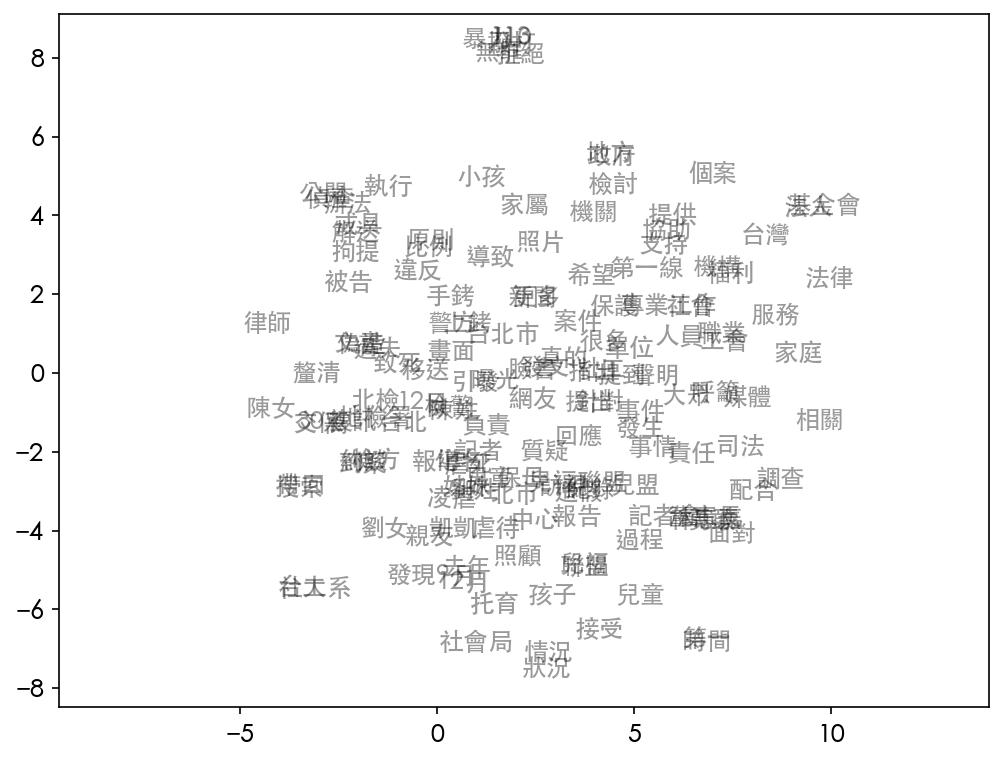

In [305]:
# fig = plt.gcf()
# fig.set_size_inches(24, 16)
plt.figure(figsize=(8, 6), dpi=150) 
# plt.figure(figsize=(8, 6), dpi=300) 
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = ['Heiti TC']
for i in range(len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.scatter(x, y, alpha=0)
    plt.annotate(words[i], xy=(x, y), alpha=0.4)
plt.axis('equal')

In [306]:
# https://www.kaggle.com/code/jerrykuo7727/word2vec
def most_similar(w2v_model, words, topn=30):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [307]:
most_similar(model, ['虐', '保母', '社工'])

,虐,cos,保母,cos,社工,cos
0,童,0.769318,劉姓,0.582747,夥伴,0.470994
1,虐童,0.543859,狠心,0.563693,接住,0.450157
2,幼童,0.489735,同年,0.549422,上銬,0.433253
3,怒,0.479358,陳以昇,0.546100,網路,0.430767
4,正面,0.475520,凱凱,0.531934,感謝,0.430079
5,日前,0.470976,1,0.525922,直言,0.425598
6,訊,0.462229,慘死,0.523868,家扶,0.424692
7,不忍,0.453543,姊妹檔,0.522638,手銬,0.423852
8,劉昌松,0.448765,認證,0.516623,熱議,0.418890
9,挺,0.445352,去年,0.515200,服務處,0.418884
